# 📌 Task 5: Model Evaluation and Interpretation

## 🎯 Objective

The objective of this task is to evaluate the final churn prediction model using
the testing dataset and interpret the factors influencing customer churn.

This task focuses on:
- Evaluating model performance using classification metrics
- Analyzing the ROC curve and AUC score
- Interpreting feature importance to understand churn drivers


## 1️⃣ Import Required Libraries

The following libraries are used for:
- Data manipulation
- Model training and evaluation
- ROC curve analysis
- Feature importance visualization


In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## 2️⃣ Load the Cleaned Dataset

The cleaned and preprocessed dataset created in Task 1 is used for evaluating
the final churn prediction model.


In [11]:
data = pd.read_csv(
    "../Task-1_Data_Preparation/dataset/Telco_Customer_Churn_Dataset_cleaned.csv"
)

data.head()


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


## 3️⃣ Feature–Target Separation

**Target Variable:** `Churn_Yes`  
**Features:** All remaining columns except `customerID`


In [12]:
X = data.drop(["Churn_Yes", "customerID"], axis=1)
y = data["Churn_Yes"]


## 4️⃣ Train–Test Split

The dataset is split using stratified sampling to preserve the original churn distribution.

- Training set: 80%
- Testing set: 20%


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## 5️⃣ Train the Final Random Forest Model

Based on Task 4, Random Forest was selected as the best-performing model.
The same configuration is used here for final evaluation and interpretation.


In [14]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 6️⃣ Model Performance Evaluation

The model is evaluated on the test dataset using the following metrics:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC


In [15]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_prob)
}

metrics


{'Accuracy': 0.794180269694819,
 'Precision': 0.6448275862068965,
 'Recall': 0.5,
 'F1-Score': 0.5632530120481928,
 'ROC-AUC': 0.8257821178537291}

## 7️⃣ Confusion Matrix Analysis

The confusion matrix shows the number of correct and incorrect predictions
made by the churn prediction model.

This is especially important for identifying false negatives, as missing
a churn-prone customer can result in lost revenue.


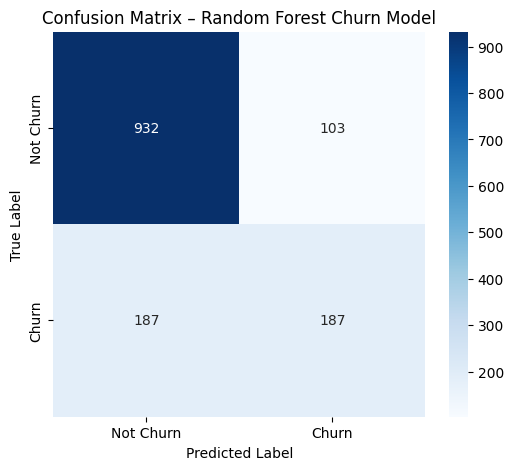

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Churn", "Churn"],
    yticklabels=["Not Churn", "Churn"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest Churn Model")
plt.show()


## 8️⃣ ROC Curve Analysis

The ROC curve illustrates the model’s ability to distinguish between
churned and non-churned customers across different classification thresholds.


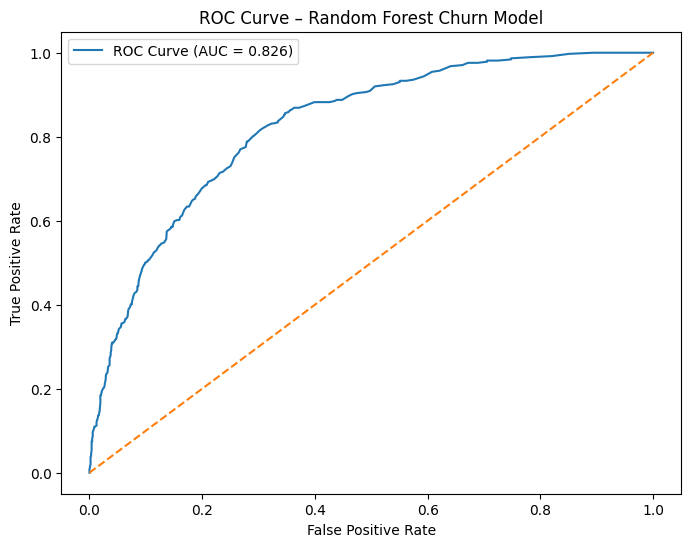

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {metrics['ROC-AUC']:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest Churn Model")
plt.legend()
plt.show()


## 9️⃣ Feature Importance Analysis

Random Forest provides feature importance scores that help identify the most
influential factors contributing to customer churn.


In [18]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
3,TotalCharges,0.176299
1,tenure,0.165743
2,MonthlyCharges,0.152622
25,Contract_Two year,0.058573
10,InternetService_Fiber optic,0.039694
28,PaymentMethod_Electronic check,0.036817
24,Contract_One year,0.029717
13,OnlineSecurity_Yes,0.029538
4,gender_Male,0.025157
26,PaperlessBilling_Yes,0.024463


## 🔟 Visualization of Top Features

The top 10 most influential features affecting customer churn are visualized below.


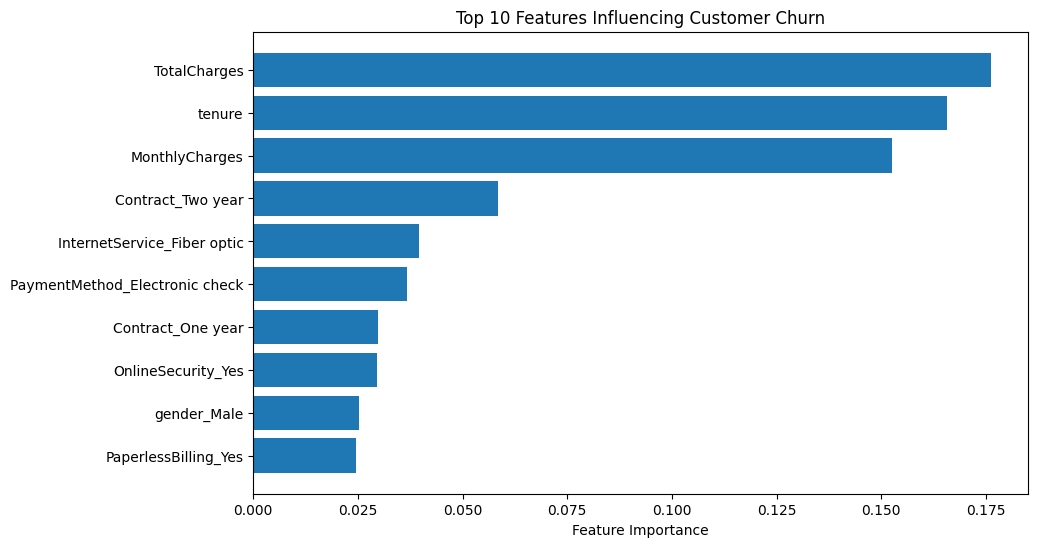

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance["Feature"][:10][::-1],
    feature_importance["Importance"][:10][::-1]
)

plt.xlabel("Feature Importance")
plt.title("Top 10 Features Influencing Customer Churn")
plt.show()


## ✅ Final Interpretation

### 🧠 Model Interpretation and Insights

The Random Forest model highlights several key factors influencing customer churn:

- Customers with short-term contracts are more likely to churn
- New customers with low tenure exhibit higher churn risk
- Higher monthly charges increase churn probability
- Payment method significantly impacts customer retention
- Internet and streaming services influence churn behavior

These insights can be leveraged to design targeted retention strategies such as
contract-based offers, pricing optimization, and improved service bundling.


## 🏁 Task 5 Completion Summary

✔ Final model evaluated on test data  
✔ Confusion matrix analyzed  
✔ ROC curve and AUC evaluated  
✔ Feature importance interpreted  
✔ Actionable business insights extracted
